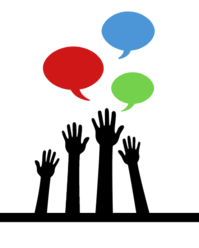

# The Sparks Foundation

## Graduate Rotational Internship Program (GRIP) April2021 Batch

### Data Science & Business Analytics 

### Prediction using Supervised ML

# By : Anshul Gupta

## Task - 1 : Predict the percentage of marks of a student based on the no. of study hours

### Importing Necessary Libraries

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

In [3]:
%matplotlib notebook

### Loading Dataset

In [4]:
data = pd.read_csv("student_scores.csv")
print("Data imported successfully")

Data imported successfully


In [5]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Info about Dataset

In [6]:
# Shape of Data
data.shape

(25, 2)

In [7]:
# Information regarding data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


In [8]:
# Columns in data
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [9]:
# Statistics about Data
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Exploratory Data Analysis

In [10]:
# Datatype of columns in dataset
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [11]:
# Checking for Null Values
data.isnull().any()

Hours     False
Scores    False
dtype: bool

<IPython.core.display.Javascript object>


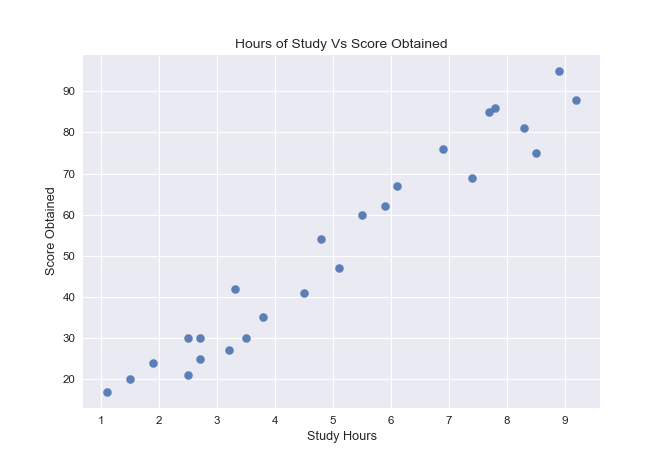

In [12]:
# Plotting a Bar plot which depicts comparision of Hours of Study Vs Score Obtained

plt.figure()

plt.scatter(x=data['Hours'],y=data['Scores'],alpha = 0.9)

plt.xlabel('Study Hours')
plt.ylabel('Score Obtained')
plt.title('Hours of Study Vs Score Obtained')

plt.show()

## Preparing Data

In [13]:
# X data
X = data.iloc[:,[0]].values

# Y data
Y = data.iloc[:,[1]].values

In [14]:
# Deriving training and testing data 
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X,Y,random_state=42)

## Training the Model

In [15]:
# Importing Linear Regression module from scikit-learn library
from sklearn.linear_model import LinearRegression

In [16]:
# Linreg Object

linreg = LinearRegression()

# Fitting Model
linreg.fit(X_train,y_train)

# Accurary Score  on Training Data
print("Linear Regression Accurary Score on Training Data: {:.2f}"
     .format(linreg.score(X_train,y_train)))

# Accurary Score on Test Data
print("Linear Regression Accurary Score on Test Data: {:.2f}"
     .format(linreg.score(X_test,y_test)))

Linear Regression Accurary Score on Training Data: 0.95
Linear Regression Accurary Score on Test Data: 0.96


In [17]:
# Linreg Coefficient
print("Linear Regression Coefficient: {}".format(linreg.coef_[0,0]))

# Linreg Intercept
print("Linear Regression Intercept: {}".format(linreg.intercept_[0]))

Linear Regression Coefficient: 9.714092192627646
Linear Regression Intercept: 2.480367091505741


<IPython.core.display.Javascript object>


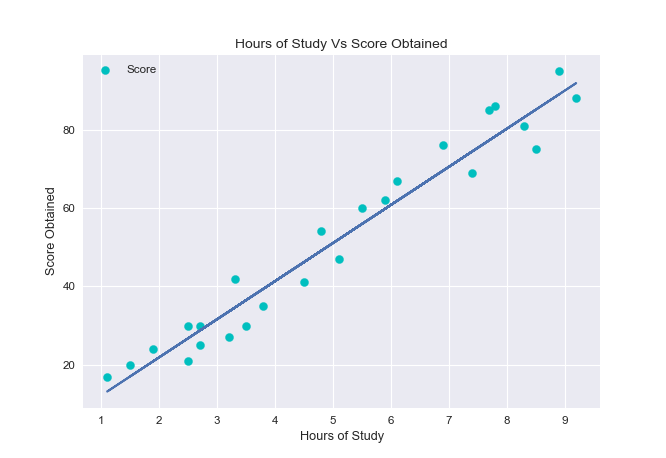

In [18]:
# Plotting the Linear regression line
LineR = linreg.coef_*X + linreg.intercept_

# Plotting for the test data
plt.scatter(X,Y,label='Score',color='c')
plt.xlabel("Hours of Study")
plt.ylabel("Score Obtained")
plt.title('Hours of Study Vs Score Obtained')
plt.plot(X, LineR);
plt.legend()
plt.show()

## Predictions for X test data

In [19]:
pred = linreg.predict(X_test)

In [20]:
pred

array([[83.10733229],
       [26.76559757],
       [26.76559757],
       [69.50760322],
       [59.79351103],
       [28.70841601],
       [34.53687133]])

## Comparing Actual vs Predicted Score

In [21]:
df = pd.DataFrame(y_test,columns=['Actual'])

df['Predicted'] = pred

In [22]:
# Dataframe containing Actual vs Predicted Score
df.head()

,Actual,Predicted
0,81,83.107332
1,30,26.765598
2,21,26.765598
3,76,69.507603
4,62,59.793511


<IPython.core.display.Javascript object>


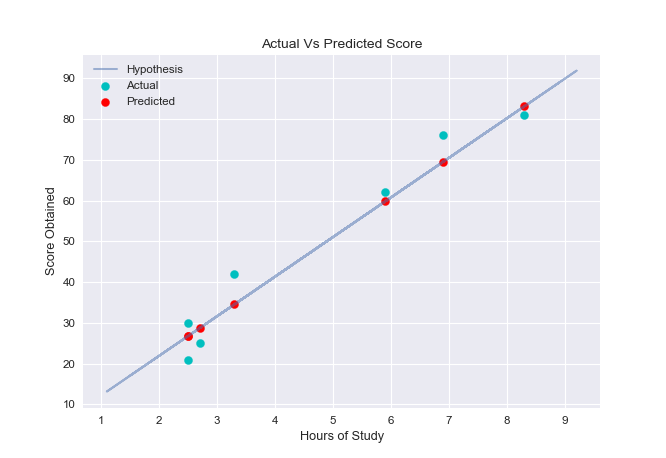

In [23]:
# Plotting the Linear regression line
LineR = linreg.coef_*X + linreg.intercept_

# Plotting for the test data
plt.scatter(X_test,y_test,label='Actual',color='c')
plt.scatter(X_test,pred,c='r',label='Predicted')
plt.xlabel("Hours of Study")
plt.ylabel("Score Obtained")
plt.title('Actual Vs Predicted Score')
plt.plot(X, LineR,alpha=0.5,label='Hypothesis');
plt.legend()
plt.show()

## What will be predicted score if a student studies for 9.25 hrs/ day?

In [24]:
time = np.array([9.25]).reshape(1, -1)

print("Time Student Studied for: {}".format(time[0,0]))

predict = linreg.predict(time)

# Score Obtained
print("Score Obtained: {}".format(predict[0,0]))

Time Student Studied for: 9.25
Score Obtained: 92.33571987331146


## Hence concluded if student studies for 9.25 hours/day ,his/her percentage of score will be around 92.3

# Model Evaluation

Model evaluation aims to estimate the generalization accuracy of a model on future (unseen/out-of-sample) data.

- <b>Mean Absolute Error</b> : Mean Absolute Error is a model evaluation metric used with regression models. The mean absolute error of a model with respect to a test set is the mean of the absolute values of the individual prediction errors on over all instances in the test set.
<br>
<br>
- <b>Mean Squared Error</b> : Mean Sqaured Error is calculated by the sum of square of prediction error which is real output minus predicted output and then divide by the number of data points. It gives you an absolute number on how much your predicted results deviate from the actual number.
<br>
<br> 
- <b>R2 Score</b> : R-squared (R2 ) tells us the degree to which the model explains the variance in the data. In other words how much better it is than just predicting the mean. 
<br>
<br>
- <b> Accuracy Score</b>: Accuracy is a common evaluation metric for classification problems. It's the number of correct predictions made as a ratio of all predictions made.

In [113]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

# Predicting over the test set and calculating the error

mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)

print('R Squared: ', r2_score(y_test, pred))
print('MSE: ', mse)
print('RMSE: ', np.sqrt(mse))
print('MAE: ', mae)

R Squared:  0.9553509219739938
MSE:  23.516396034595214
RMSE:  4.849370684387327
MAE:  4.4253946751561815


## Task Completed
## Thankyou!